In [16]:
import sys
sys.path.append("D:\python\lib\site-packages")

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as io
import pandas as pd

import itertools

from sklearn import preprocessing, svm, utils, datasets
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression, SGDClassifier

In [ ]:
data_app = pd.read_csv('./google-play-store-apps/googleplaystore.csv', sep=',')

In [ ]:
pd.read_csv('./google-play-store-apps/googleplaystore.csv', sep=',',encoding="ISO-8859-1")

In [2]:
data_app = pd.read_csv('./google-play-store-apps/googleplaystore.csv', sep=',')
print(data_app.shape)

head = data_app.columns
print(head)

(10841, 13)
Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')


In [3]:
print(data_app.shape)

head = data_app.columns
print("----")
for i in range(len(head)):
    print(i, head[i])
print("----")

data_app_c = np.array(data_app)

i=0
for i in range(len(data_app_c[:])):
    if data_app_c[i][5] == "Free":
        print("THIS: ", data_app_c[i])
        data_app_c1 = np.delete(data_app_c, i, 0)

data_app_c = data_app_c1


i=0
for i in range(len(data_app_c[:])):
    for char in data_app_c[i][5]:
        if char in " ?.!/;:+,":
            data_app_c[i][5] = data_app_c[i][5].replace(char,'')
    if float(data_app_c[i][5]) <= 100:
        data_app_c[i][5] = 100
    if float(data_app_c[i][5]) > 100 and int(data_app_c[i][5])<= 5000:
        data_app_c[i][5] = 5000
    if float(data_app_c[i][5]) > 5000 and int(data_app_c[i][5])<= 50000:
        data_app_c[i][5] = 50000
    if float(data_app_c[i][5]) > 50000 and int(data_app_c[i][5])<= 500000:
        data_app_c[i][5] = 500000
    if float(data_app_c[i][5]) > 500000 and int(data_app_c[i][5])<= 5000000:
        data_app_c[i][5] = 5000000
    if float(data_app_c[i][5]) > 5000000:
        data_app_c[i][5] = 10000000
        
for i in range(len(data_app_c[:])):
    if data_app_c[i][4].endswith("M"):
        data_app_c[i][4] = data_app_c[i][4][:-1]
    if data_app_c[i][4] == "Varies with device":
        data_app_c[i][4] = float("NaN")
    elif data_app_c[i][4].endswith("k"):
        data_app_c[i][4] = float(data_app_c[i][4][:-1])/1000
    if data_app_c[i][2] == "#¡NUM!":
        data_app_c[i][2] = float("NaN")
    if data_app_c[i][6] == 'Free':     #free is encoded as 0
        data_app_c[i][6] = 0
    if data_app_c[i][6] == 'Paid':     #paid is encoded as 1
        data_app_c[i][6] = 1 
 
print(data_app_c[2])


(10841, 13)
----
0 App
1 Category
2 Rating
3 Reviews
4 Size
5 Installs
6 Type
7 Price
8 Content Rating
9 Genres
10 Last Updated
11 Current Ver
12 Android Ver
----
THIS:  ['Life Made WI-Fi Touchscreen Photo Frame' '1.9' 19.0 '3.0M' '1,000+'
 'Free' '0' 'Everyone' nan 'February 11, 2018' '1.0.19' '4.0 and up' nan]
['U Launcher Lite – FREE Live Cool Themes, Hide Apps' 'ART_AND_DESIGN' 4.7
 '87510' '8.7' 5000000 0 '0' 'Everyone' 'Art & Design' 'August 1, 2018'
 '1.2.4' '4.0.3 and up']


In [4]:
data_app_cN = pd.DataFrame(data_app_c)
data_app_cN = data_app_cN .dropna()

data_app_cN = data_app_cN.values
print(data_app_c.shape)
print(data_app_cN.shape)

print(data_app_c[2])
print(data_app_cN[2])

(10840, 13)
(7723, 13)
['U Launcher Lite – FREE Live Cool Themes, Hide Apps' 'ART_AND_DESIGN' 4.7
 '87510' '8.7' 5000000 0 '0' 'Everyone' 'Art & Design' 'August 1, 2018'
 '1.2.4' '4.0.3 and up']
['U Launcher Lite – FREE Live Cool Themes, Hide Apps' 'ART_AND_DESIGN' 4.7
 '87510' '8.7' 5000000 0 '0' 'Everyone' 'Art & Design' 'August 1, 2018'
 '1.2.4' '4.0.3 and up']


In [5]:
#transforming numerical values to float 
for i in range(len(data_app_c[:])):
    data_app_c[i][2] = float(data_app_c[i][2]) #Rating
    data_app_c[i][3] = float(data_app_c[i][3]) #Reviews
    data_app_c[i][4] = float(data_app_c[i][4]) #Size
    data_app_c[i][5] = int(data_app_c[i][5]) #Installs

        
#delete the name category for everything
del_categories = [0, 7, 9, 10, 11, 12]
data_app_c = np.delete(data_app_c, del_categories, 1)
data_app_cN = np.delete(data_app_cN, del_categories, 1)
head = np.delete(head, del_categories)

print(data_app_c.shape)
print(data_app_cN.shape)
print("----")


print("----")
for i in range(len(head)):
    print(i, head[i])
print("----")

# columns = [1'Category', 2'Rating', 3'Reviews', 4'Size', 5 Installs', 6'Type', 7'Content Rating'])


(10840, 7)
(7723, 7)
----
----
0 Category
1 Rating
2 Reviews
3 Size
4 Installs
5 Type
6 Content Rating
----


In [ ]:
# # print(data_app_c.isna().sum())

# # print(data_app_c.isna().sum())
# data_app_c.isnull().sum().sum()
# data_app_c = data_app_c.dropna()
# print(data_app_c.isnull().sum().sum())
# data_app_c = data_app_c.reset_index()
# data_app_c = data_app_c.values

In [6]:
le = preprocessing.LabelEncoder()

a = le.fit_transform(data_app_cN.T[0].astype(str)) #Category
data_app_cN.T[0] = a
a = le.fit_transform(data_app_cN.T[5].astype(str)) #Type
data_app_cN.T[5] = a
a = le.fit_transform(data_app_cN.T[6].astype(str)) #Content Rating
data_app_cN.T[6] = a


#transforming numerical values to float 
for i in range(len(data_app_cN[:])):
    for h in range(len(head)):
        data_app_cN[i][h] = float(data_app_cN[i][h])

#transforming numerical values to float 
for i in range(len(data_app_cN[:])):
    data_app_cN[i][4] = int(data_app_cN[i][4])

# a = le.fit_transform(data_app_cN.T[0].astype(str)) #Category
# data_app_cN.T[0] = a
# a = le.fit_transform(data_app_cN.T[5].astype(str)) #Type
# data_app_cN.T[5] = a
# a = le.fit_transform(data_app_cN.T[6].astype(str)) #Content Rating
# data_app_cN.T[6] = a


# enc = preprocessing.OneHotEncoder()
# enc.fit(data_app_cN)
# onehotlabels = enc.transform(data_app_cN).toarray()
# onehotlabels.shape

# print(data_app_cN.shape)
# print(data_app_cN)
# print(onehotlabels.shape)
# print(onehotlabels)


print(data_app_cN)
print(data_app_cN.shape)

[[0.0 4.1 159.0 ... 50000 0.0 1.0]
 [0.0 3.9 967.0 ... 500000 0.0 1.0]
 [0.0 4.7 87510.0 ... 5000000 0.0 1.0]
 ...
 [11.0 4.5 38.0 ... 5000 0.0 1.0]
 [11.0 5.0 4.0 ... 100 0.0 1.0]
 [18.0 4.5 398307.0 ... 10000000 0.0 1.0]]
(7723, 7)


In [17]:
# split into input (X) and output (Y) variables
#Xa = data_app_cN[:, [0, 1, 2, 3, 5, 6]]
Xa = data_app_cN[:, [0, 1, 3, 5, 6]]
Ya = data_app_cN[:,4]

X_train, X_test, y_train, y_test = train_test_split(Xa, Ya, test_size=0.33, random_state=42)

print(X_train, X_test, y_train, y_test)

#print(utils.multiclass.type_of_target(y_train.astype('int')))

clf = svm.SVC(decision_function_shape='ovo')
clf.fit(X_train.astype('float'), y_train.astype('int'))
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

[[30.0 4.4 29.0 0.0 1.0]
 [20.0 4.4 20.0 0.0 1.0]
 [13.0 3.9 28.0 0.0 1.0]
 ...
 [15.0 4.8 11.0 0.0 1.0]
 [21.0 4.6 19.0 0.0 4.0]
 [11.0 3.4 0.246 0.0 1.0]] [[5.0 3.3 18.0 0.0 4.0]
 [29.0 4.6 14.0 0.0 1.0]
 [29.0 3.5 9.1 0.0 1.0]
 ...
 [23.0 3.7 0.376 1.0 1.0]
 [28.0 4.4 66.0 0.0 1.0]
 [7.0 5.0 5.0 0.0 3.0]] [5000000 50000 50000 ... 10000000 5000000 5000] [500000 5000000 10000000 ... 5000 10000000 100]


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [18]:
pred = clf.predict(X_test.astype('float'))
print(X_test.shape)

print("Accuracy score: ", accuracy_score(y_test.astype('int'), pred.astype("int")))

install_win = np.unique(y_train.astype('int')).astype("str")
print(install_win)

print(classification_report(y_test.astype('int'), pred.astype("int"), target_names=install_win, sample_weight=None, digits=3))

(2549, 5)
Accuracy score:  0.314633189486073
['100' '5000' '50000' '500000' '5000000' '10000000']
             precision    recall  f1-score   support

        100      0.143     0.014     0.026       139
       5000      0.317     0.319     0.318       411
      50000      0.287     0.255     0.270       463
     500000      0.296     0.217     0.250       545
    5000000      0.291     0.474     0.360       578
   10000000      0.430     0.385     0.406       413

avg / total      0.310     0.315     0.303      2549



In [19]:
gnb = GaussianNB()
KNN = KNeighborsClassifier(n_neighbors=1)
BNB = BernoulliNB()
LR = LogisticRegression()
SVC = SVC()
SDG = SGDClassifier()
LSVC = LinearSVC()

x1, x2, y1, y2 = X_train, X_test, y_train, y_test

# Train our classifier and test predict
gnb.fit(x1.astype("float"), y1.astype("int"))
y2_GNB_model = gnb.predict(x2.astype("float"))
print("GaussianNB Accuracy :", accuracy_score(y2.astype("int"), y2_GNB_model.astype("int")))

KNN.fit(x1.astype("float"),y1.astype("int"))
y2_KNN_model = KNN.predict(x2.astype("float"))
print("KNN Accuracy :", accuracy_score(y2.astype("int"), y2_KNN_model.astype("int")))

BNB.fit(x1.astype("float"),y1.astype("int"))
y2_BNB_model = BNB.predict(x2.astype("float"))
print("BNB Accuracy :", accuracy_score(y2.astype("int"), y2_BNB_model.astype("int")))

LR.fit(x1.astype("float"),y1.astype("int"))
y2_LR_model = LR.predict(x2.astype("float"))
print("LR Accuracy :", accuracy_score(y2.astype("int"), y2_LR_model.astype("int")))

SDG.fit(x1.astype("float"),y1.astype("int"))
y2_SDG_model = SDG.predict(x2.astype("float"))
print("SDG Accuracy :", accuracy_score(y2.astype("int"), y2_SDG_model.astype("int")))

SVC.fit(x1.astype("float"),y1.astype("int"))
y2_SVC_model = SVC.predict(x2.astype("float"))
print("SVC Accuracy :", accuracy_score(y2.astype("int"), y2_SVC_model.astype("int")))

LSVC.fit(x1.astype("float"),y1.astype("int"))
y2_LSVC_model = LSVC.predict(x2.astype("float"))
print("LSVC Accuracy :", accuracy_score(y2.astype("int"), y2_LSVC_model.astype("int")))


GaussianNB Accuracy : 0.23970184386033738
KNN Accuracy : 0.31777167516673205
BNB Accuracy : 0.2530404080031385
LR Accuracy : 0.297371518242448
SDG Accuracy : 0.21341702628481757


D:\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SVC Accuracy : 0.314633189486073
LSVC Accuracy : 0.25892506865437426


Confusion matrix, without normalization
[[  5  68   5   1  22  38]
 [  1 126  30  12  54 188]
 [  3  88  30  18  68 256]
 [  2  39  31  12  76 385]
 [  0  11  17  10  61 479]
 [  0   0   5   2  29 377]]
Normalized confusion matrix
[[0.04 0.49 0.04 0.01 0.16 0.27]
 [0.   0.31 0.07 0.03 0.13 0.46]
 [0.01 0.19 0.06 0.04 0.15 0.55]
 [0.   0.07 0.06 0.02 0.14 0.71]
 [0.   0.02 0.03 0.02 0.11 0.83]
 [0.   0.   0.01 0.   0.07 0.91]]
Confusion matrix, without normalization
[[ 18  42  27  12  28  12]
 [ 36 105  83  78  70  39]
 [ 26  76 130 126  75  30]
 [  9  92  88 144 139  73]
 [ 14  62  85  92 217 108]
 [  2  23  48  54  90 196]]
Normalized confusion matrix
[[0.13 0.3  0.19 0.09 0.2  0.09]
 [0.09 0.26 0.2  0.19 0.17 0.09]
 [0.06 0.16 0.28 0.27 0.16 0.06]
 [0.02 0.17 0.16 0.26 0.26 0.13]
 [0.02 0.11 0.15 0.16 0.38 0.19]
 [0.   0.06 0.12 0.13 0.22 0.47]]
Confusion matrix, without normalization
[[  0  33   0   1 105   0]
 [  0  70   0   0 341   0]
 [  0  50   0   6 407   0]
 [  0  23   0   7 5

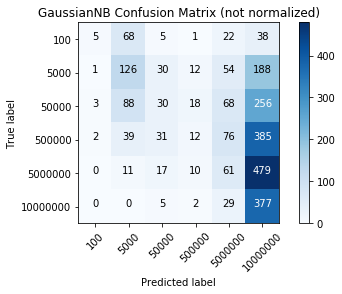

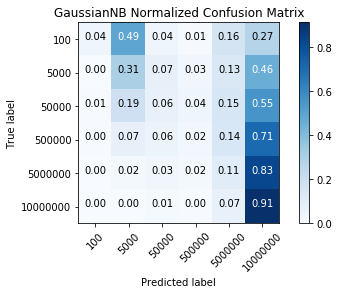

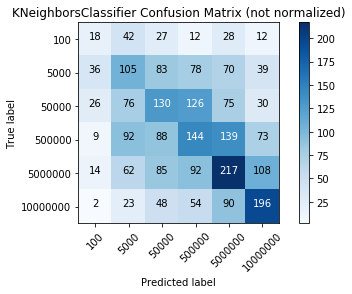

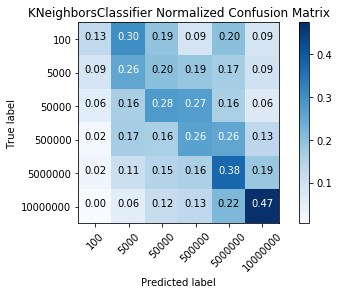

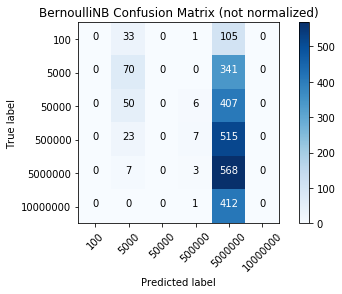

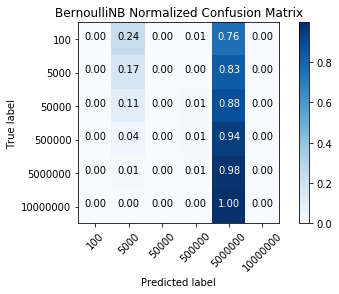

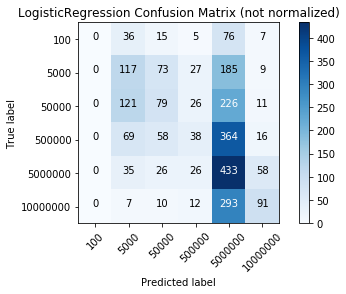

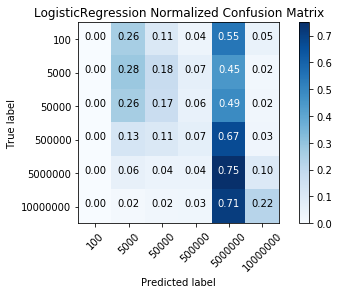

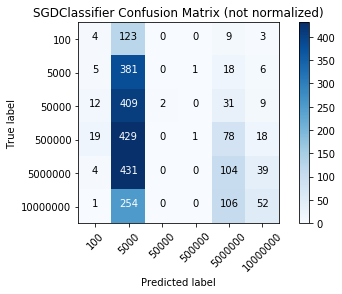

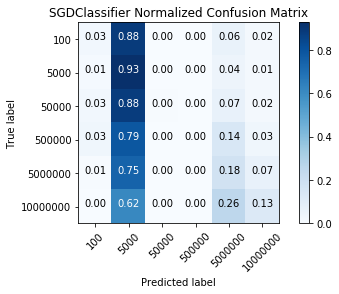

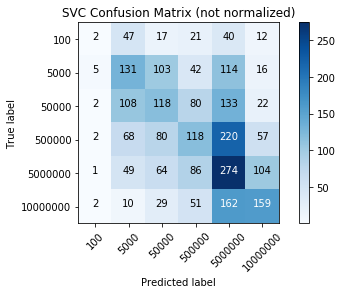

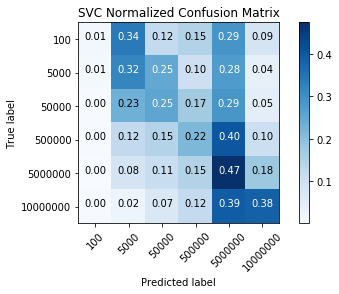

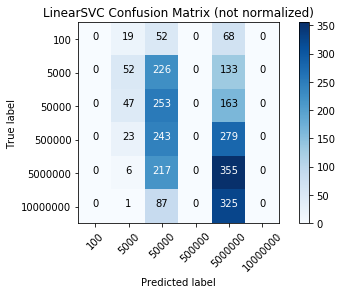

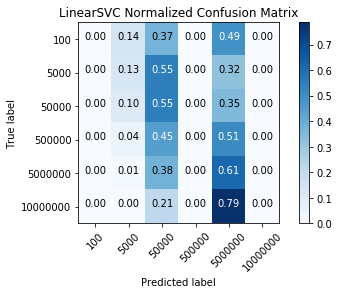

In [20]:
class_names = install_win

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

models = [y2_GNB_model, y2_KNN_model, y2_BNB_model, y2_LR_model, y2_SDG_model, y2_SVC_model, y2_LSVC_model]
modelNames = ["GaussianNB", "KNeighborsClassifier", "BernoulliNB", "LogisticRegression", "SGDClassifier", "SVC", "LinearSVC"]

for i in range(len(models)):
    # Compute confusion matrix
    cnf_matrix = confusion_matrix(y2.astype("int"), models[i].astype("int"))
    np.set_printoptions(precision=2)
    
    A = (modelNames[i] + ' Confusion Matrix (not normalized)')
    B = (modelNames[i] + ' Normalized Confusion Matrix')
    
    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=class_names,
                          title = A)
    plt.savefig("./Plots\Confusion Matrix/NoReviews_"+A+'.png')
    # Plot normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                          title = B)
    plt.savefig("./Plots\Confusion Matrix/NoReviews_"+B+'.png')

#plt.show()

In [ ]:
# fix random seed for reproducibility
numpy.random.seed(7)

In [ ]:
# split into input (X) and output (Y) variables
X = data_app_cN[:, [0, 1, 2, 3, 5, 6]]
Y = data_app_cN[:,4]

In [ ]:
# create model
model = Sequential()
model.add(Dense(12, input_dim=7, init='uniform', activation='relu'))
model.add(Dense(7, init='uniform', activation='relu'))
model.add(Dense(1, init='uniform', activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(X, Y, epochs=150, batch_size=10,  verbose=2)
# calculate predictions
predictions = model.predict(X)
# round predictions
rounded = [round(x[0]) for x in predictions]
print(rounded)

In [ ]:
pd.DataFrame(onehotlabels)

In [ ]:
#print(pd.DataFrame.describe(pd.DataFrame(data_app_c[:, 4])))
#print("--------")
n_samp = 7000

data_app_c = onehotlabels

random_idx = np.random.randint(0, len(data_app_c[:, 1]), n_samp)
rating_t = data_app_c[:, 1][random_idx].astype(float)

random_idx = np.random.randint(0, len(data_app_c[:, 2]), n_samp)
review_t = data_app_c[:, 2][random_idx].astype(float)

random_idx = np.random.randint(0, len(data_app_c[:, 4]), n_samp)
installs_t = data_app_c[:, 4][random_idx].astype(int)





plt.plot(review_t, alpha = 0.5, label = head[2])
plt.title(head[2])

plt.plot(installs_t, alpha = 0.5, label = head[4])
plt.title(head[4])

plt.plot(rating_t, alpha = 0.5, label = head[1])
plt.title(head[4])

plt.legend()

#not sure what this should plot but it gives an error
plt.figure(figsize=(10,10))

i=0
for i in enumerate(head):        
    plt.subplot(5,5, i+1)
    plt.hist(data_app_c[:,i])
    plt.title(head[i])
    plt.legend()
    plt.tight_layout()

In [ ]:
dataframe_app_c = pd.DataFrame(onehotlabels)
dataframe_app_c.shape

In [ ]:
# K-Means Clustering

X = dataframe_app_c


#REMOVED AOVE: App  object

#Category           object
#Rating            float64
#Reviews            object
#Size               object
#Installs           object
#Type               object
#Price              object
#Content Rating     object
#Genres             object
#Last Updated       object
#Current Ver        object
#Android Ver        object

X = pd.DataFrame(X)
X = X.convert_objects(convert_numeric=True)
#X.columns = onehotlabels.T[:] #['Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type','Content Rating']

# Eliminating null values
#for i in X.columns:
    #X[i] = X[i].fillna(int(X[i].mean()))
#for i in X.columns:
    #print(X[i].isnull().sum())
    

# Using the elbow method to find  the optimal number of clusters
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Applying k-means to the googleplaydata dataset
kmeans = KMeans(n_clusters=4,init='k-means++',max_iter=300,n_init=10,random_state=0) 
y_kmeans = kmeans.fit_predict(X)

X = X.as_matrix(columns=None)

# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0,1],s=100,c='red',label='C1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1,1],s=100,c='blue',label='C2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2,1],s=100,c='green',label='C3')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='Centroids')
plt.title('Clusters of apps')
plt.legend()
plt.show()

In [ ]:
from __future__ import absolute_import, division, print_function

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)